In [8]:
%matplotlib inline

import time

import pandas as pd
import seaborn as sns
import trulia.stats
import trulia.location

sns.set_context("talk")

ZILLOW_KEY = 'X1-ZWz1a2mgypz4zv_9hc6e'
TRULIA_KEY = 'rtefyvzwqqk8k6stmhpm979y'

In [12]:
neighborhoods = trulia.location.LocationInfo(TRULIA_KEY).get_neighborhoods_in_city("Fresno", "CA")
neighborhoods

[OrderedDict([(u'id', u'656'), (u'name', u'Bullard')]),
 OrderedDict([(u'id', u'657'), (u'name', u'Central')]),
 OrderedDict([(u'id', u'658'), (u'name', u'Edison')]),
 OrderedDict([(u'id', u'659'), (u'name', u'Fresno-High')]),
 OrderedDict([(u'id', u'660'), (u'name', u'Hoover')]),
 OrderedDict([(u'id', u'661'), (u'name', u'McLane')]),
 OrderedDict([(u'id', u'662'), (u'name', u'North Growth Area')]),
 OrderedDict([(u'id', u'663'), (u'name', u'Roosevelt')]),
 OrderedDict([(u'id', u'664'), (u'name', u'Southeast Growth Area')]),
 OrderedDict([(u'id', u'665'), (u'name', u'West')]),
 OrderedDict([(u'id', u'666'), (u'name', u'Woodward Park')])]

In [16]:
rows = []
for n in neighborhoods:
    neighborhood_stats = (trulia.stats.TruliaStats(TRULIA_KEY)
                          .get_neighborhood_stats(neighborhood_id=n['id'], start_date="2000-01-01", end_date="2015-10-1"))
    for i in range(len(neighborhood_stats['listingStats']['listingStat'])):
        try:
            date = neighborhood_stats['listingStats']['listingStat'][i]['weekEndingDate']
            price = neighborhood_stats['listingStats']['listingStat'][i]['listingPrice']['subcategory'][1]['medianListingPrice']
            rows.append({'date': date, 'price': price, 'neighborhood': n['name']})
        except:
            pass
    time.sleep(1)
rows = pd.DataFrame(rows)
rows.to_csv('data/fresno_neighborhood_all_listings_medians.csv')

In [17]:
rows = pd.read_csv('data/fresno_neighborhood_all_listings_medians.csv')
rows.date = pd.to_datetime(rows.date)
rows.price = rows.price.map(lambda x: int(x))
rows = (rows.groupby(['date', 'neighborhood'])
        .mean().reset_index()
        .pivot(index='date', columns='neighborhood', values='price'))

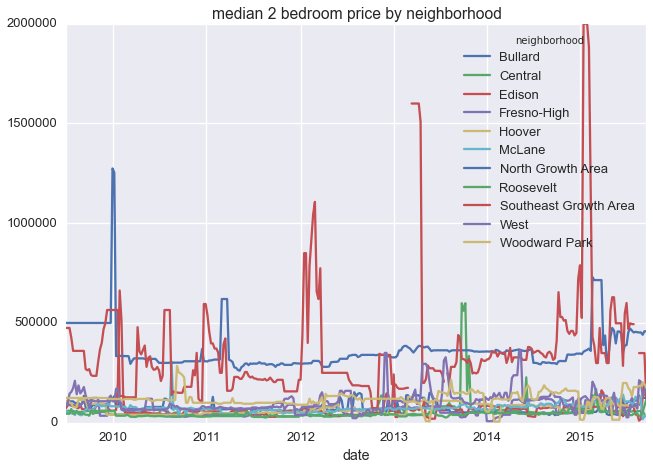

In [18]:
rows.plot().set_title('median 2 bedroom price by neighborhood')